<a href="https://colab.research.google.com/github/Chaa00/FASHION-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

In [2]:
#fashion MNIST 

fashion_mnist=tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test)=fashion_mnist.load_data()
images=images[:10000]
targets=targets[:10000]
print(images.shape)
print(targets.shape)

4423680/4422102 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000,)


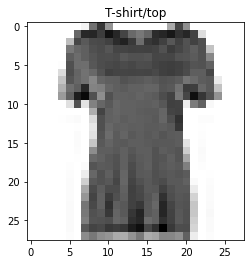

In [3]:
targets_names=["T-shirt/top","Trouser","pulllover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]
plt.imshow(images[10],cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [4]:
print("first line of our image",images[11][0])
print ("associated target",targets[11])

first line of our image [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85
  27   0   0   0   0   0   1   0   0   0]
associated target 9


In [5]:
#create the model 
#flatten the image , remplacer l'image en un seul vecteur 
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
print("shape of the image",images[0:1].shape)
model_output=model.predict(images[0:1])
print("shape of the image after flatten" , model_output.shape) #ce n'est plus une matrice ( ca devient un vecteur )

shape of the image (1, 28, 28)
shape of the image after flatten (1, 784)


In [6]:
#add layers 
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(256,activation="relu")) #first layer (Dense= layer of 256 neurone )
model.add(tf.keras.layers.Dense(128, activation="relu")) #second layer
model.add(tf.keras.layers.Dense(10,activation="softmax")) #output layer 
model_output=model.predict(images[0:1])
print(model_output,targets[0:1])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] [9]


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
#compile the model 
model.compile( optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [9]:
#train the model 
history=model.fit(images, targets , epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 9.2292 - accuracy: 0.6876
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.3396 - accuracy: 0.7608
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.8899 - accuracy: 0.7776
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6501 - accuracy: 0.8029
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5505 - accuracy: 0.8217
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8274
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4788 - accuracy: 0.8379
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.8456
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.8397
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4318 - accuracy: 0.8515

In [10]:
loss_value,acc_value=model.evaluate(images_test,targets_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.8081


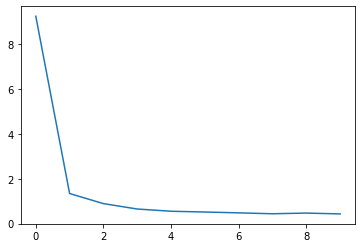

In [11]:
loss_curve=history.history["loss"]
plt.plot(loss_curve)
plt.show()

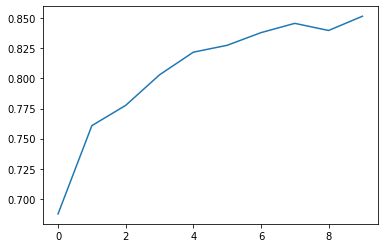

In [12]:
acc_curve=history.history["accuracy"]
plt.plot(acc_curve)
plt.show()

In [13]:
model.save('fashion_mnist')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_mnist/assets


In [14]:
new_model=tf.keras.models.load_model('fashion_mnist')

In [15]:
predictions=new_model.predict(images_test)
print(predictions)

[[4.2285775e-25 1.8686630e-13 9.7627906e-16 ... 5.4248059e-03
  2.4646551e-17 9.9456257e-01]
 [8.5305079e-09 2.9193013e-22 9.8451668e-01 ... 3.7410633e-34
  3.9546701e-14 2.2268745e-24]
 [2.9009831e-12 9.9999988e-01 2.6776978e-10 ... 3.7269654e-29
  6.4300627e-16 8.7232515e-24]
 ...
 [1.1950704e-06 5.8525024e-19 8.8874477e-11 ... 1.3841352e-12
  9.9999881e-01 7.7666586e-26]
 [6.4399283e-13 9.9999988e-01 9.1303347e-09 ... 1.7974778e-29
  1.9887906e-15 8.0263402e-24]
 [1.3505001e-05 9.2941420e-03 4.1386276e-03 ... 2.2510685e-01
  2.7702104e-02 5.2148843e-01]]


In [16]:
print(np.argmax(predictions[10]))

4


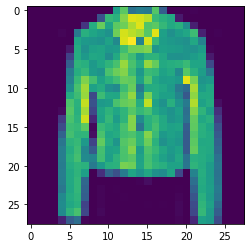

In [17]:
plt.imshow(images_test[10])
plt.show()